# KNN MODEL ON DIABETES DATA

## IMPORTING CSV DATA IN PYTHON

In [5]:
#Important Libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#If you dont have the data in same location as the python script you can import usinf the location of the dataset as shown below
#dataset=pd.read_csv(r'C:\Users\Diana\Documents\Msc Data Analytics course work\Machine Learning for Data Analysis\Tutorial\diabetes.csv')
dataset = pd.read_csv("./diabetes.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
#The data is a numpy array of shape (768, 9), meaning it has 9 variables and 768 observations
dataset.shape
print(dataset.shape)

(768, 9)


In [7]:
#Identify the xs (features) and the Ys
#iloc means locate the indices
#we always start with rows then columns
#: means select all the values in the row i.e including upper and lower bounds
#:-1 means include all columns except the last one, which is the upper bound
X = dataset.iloc[:,:-1].values # x is the matrix of features 
Y = dataset.iloc[:,-1].values  # The dependent variable vector


In [8]:
#The matrix of features(the independent variables)
print(X)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [9]:
#The matrix for the predicted (dependent variable)
print(Y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

# Analyzing the Diabetes Data

# Preprocessing Diabetes Data

In [10]:
#Normalizing the Data
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
#Splittig the data
#x_train is the training dataset without the dependent variables
#x_test is the test dataset without the dependent variables
#y_test test datatest with dependent varaibles
#y_train training dataset with independent variables
#dataset.iloc[:,:-1] shows only the dataset with the independent variables
#dataset.iloc[:,-1] shows only the dataset with the dependent variable
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(dataset.iloc[:,:-1],
                                                                  dataset.iloc[:,-1],
                                                                 test_size = 0.2, random_state = 42)

In [19]:
#Print the training dataset with only the independent variables
print(x_train)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
60             2       84              0              0        0   0.0   
618            9      112             82             24        0  28.2   
346            1      139             46             19       83  28.7   
294            0      161             50              0        0  21.9   
231            6      134             80             37      370  46.2   
..           ...      ...            ...            ...      ...   ...   
71             5      139             64             35      140  28.6   
106            1       96            122              0        0  22.4   
270           10      101             86             37        0  45.6   
435            0      141              0              0        0  42.4   
102            0      125             96              0        0  22.5   

     DiabetesPedigreeFunction  Age  
60                      0.304   21  
618                     1.282   50  


In [20]:
print(y_train)

60     0
618    1
346    0
294    0
231    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 614, dtype: int64


# Creating the K-Nearest Neigbor Classifier

In [48]:
#Import important library
from sklearn.neighbors import KNeighborsClassifier

#number of neighbors, can be random
neighbors = np.arange(1,50)

#Declare and initialize the matrix
train_accuracy = np.zeros(len(neighbors))
test_accuracy = np.zeros(len(neighbors))


In [49]:
# We now enumerate over all the nine neighbor values and for each neighbor we predict both training and test set data and then store the accuracy in training_accuracy and test_accuracy numpy arrays
#This for loop checks all the k's from 1,2,3...
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k) #initialize an object called knn using the KNeighborclassifier method
    
    #Fit the model
    knn.fit(x_train, y_train)
    
    #compute accuracy on training set
    train_accuracy[i] = knn.score(x_train, y_train)
    
    #compute accuracy on test set
    test_accuracy[i] = knn.score(x_test, y_test)
    
    print(train_accuracy[i], '\t', test_accuracy[i])
    
    

1.0 	 0.6753246753246753
0.8322475570032574 	 0.7012987012987013
0.8550488599348535 	 0.6493506493506493
0.8094462540716613 	 0.7077922077922078
0.7980456026058632 	 0.6623376623376623
0.7882736156351792 	 0.7272727272727273
0.7931596091205212 	 0.6883116883116883
0.7768729641693811 	 0.7467532467532467
0.7931596091205212 	 0.7207792207792207
0.7899022801302932 	 0.7662337662337663
0.7866449511400652 	 0.7337662337662337
0.7833876221498371 	 0.7792207792207793
0.7899022801302932 	 0.7727272727272727
0.7899022801302932 	 0.7727272727272727
0.7850162866449512 	 0.7597402597402597
0.7850162866449512 	 0.7792207792207793
0.7833876221498371 	 0.7727272727272727
0.7703583061889251 	 0.7597402597402597
0.7752442996742671 	 0.7532467532467533
0.7719869706840391 	 0.7272727272727273
0.7736156351791531 	 0.7402597402597403
0.7638436482084691 	 0.7402597402597403
0.7654723127035831 	 0.7142857142857143
0.762214983713355 	 0.7467532467532467
0.760586319218241 	 0.7142857142857143
0.747557003257329

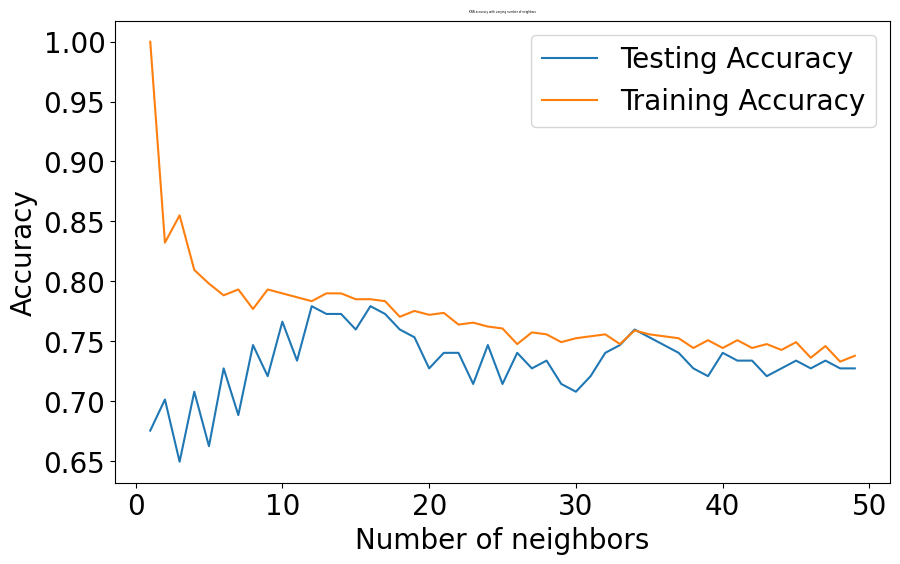

In [50]:
#Plot the training and test accuracy using matplotlib
plt.figure(figsize = (10,6))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 2)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend(prop = {'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [57]:
#Now lets use n = 34 since both models perform best at neighbor n = 34
knn = KNeighborsClassifier(n_neighbors = 34)

#fit the training model
knn.fit(x_train, y_train)

#compute the accuracy on training set
train_accuracy = knn.score(x_train, y_train)

#compute the accuracy on test set
test_accuracy = knn.score(x_test, y_test)


# Evaluating the Model

In [56]:
#Display the test accuracy
print(test_accuracy)

0.7597402597402597


# Confusion Matrix

In [59]:
#Import the import library for confusion matrix
from sklearn.metrics import confusion_matrix

#predict the results by calling a method 'predict()'
prediction = knn.predict(x_test)

# Display the confusion matrix
confusion_matrix(y_test, prediction)


array([[90,  9],
       [28, 27]], dtype=int64)

In [60]:
# import the library classification_report
from sklearn.metrics import classification_report

# Display the report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83        99
           1       0.75      0.49      0.59        55

    accuracy                           0.76       154
   macro avg       0.76      0.70      0.71       154
weighted avg       0.76      0.76      0.75       154

